In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Initial Sniff 

In [2]:
car_data = pd.read_csv('car_details_v3.csv')
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
car_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
car_data.quantile(q=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,year,selling_price,km_driven,seats
0.01,2002.0,55000.0,4000.0,4.0
0.10,2008.0,150000.0,15000.0,5.0
0.25,2011.0,254999.0,35000.0,5.0
0.50,2015.0,450000.0,60000.0,5.0
0.75,2017.0,675000.0,98000.0,5.0
0.90,2018.0,1025000.0,120000.0,7.0
0.99,2019.0,5200000.0,225000.0,9.0


In [6]:
car_data.loc[car_data['selling_price'] >= 5200000.0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
136,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
139,BMW X4 M Sport X xDrive20d,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,282 bhp,490Nm@ 1600rpm,5.0
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0
384,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
7757,BMW 5 Series 520d Luxury Line,2019,5200000,10000,Diesel,Dealer,Automatic,First Owner,18.12 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
7872,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
7873,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0


In [7]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Drop Null 

In [8]:
car_data_dropped = car_data.dropna()

In [9]:
car_data_dropped.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
car_data_dropped.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Erase units

In [11]:
def drop_units(str_with_units):
    if isinstance(str_with_units, str):
        return float(str_with_units.split()[0])
    
car_data_dropped['mileage'] = car_data_dropped['mileage'].apply(drop_units)
car_data_dropped['engine'] = car_data_dropped['engine'].apply(drop_units)
car_data_dropped['max_power'] = car_data_dropped['max_power'].apply(drop_units)


/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/615216730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['mileage'] = car_data_dropped['mileage'].apply(drop_units)
/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/615216730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['engine'] = car_data_dropped['engine'].apply(drop_units)
/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/615216730.py:7: SettingWithCopyWarning: 
A 

In [12]:
def get_torque(torque_str):
    if isinstance(torque_str, str):
        num = float(re.search(r'^[0-9]*\.?[0-9]+', torque_str)[0])
        if 'kgm' in torque_str:
            num *= 9.80665
        return num

In [13]:
car_data_dropped['torque'] = car_data_dropped['torque'].apply(get_torque)

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/2943844366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['torque'] = car_data_dropped['torque'].apply(get_torque)


In [14]:
car_data_dropped.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0


# Transform year

In [15]:
car_data_dropped['year'] = 2021 - car_data_dropped['year']
car_data_dropped

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/2470724038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['year'] = 2021 - car_data_dropped['year']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,7,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0
3,Hyundai i20 Sportz Diesel,11,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0
4,Maruti Swift VXI BSIII,14,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,8,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0
8124,Hyundai Verna CRDi SX,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0
8125,Maruti Swift Dzire ZDi,12,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0
8126,Tata Indigo CR4,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0


# Transform Name 

In [16]:
def car_name(s):
    return s.split()[0]
car_data_dropped['name'] = car_data_dropped['name'].apply(car_name)

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/976029127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['name'] = car_data_dropped['name'].apply(car_name)


In [17]:
car_data_dropped['name'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64

In [18]:
'+'.join(car_data_dropped.columns)

'name+year+selling_price+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+seats'

In [19]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model 1

In [20]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+C(seats)',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     872.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:07   Log-Likelihood:            -1.1112e+05
No. Observations:                7906   AIC:                         2.224e+05
Df Residuals:                    7851   BIC:                         2.227e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        6.613e+05   2.76e+05      2.399      0.016    1.21e+05     1.2e+06
name[T.Ashok]                   -3.656e+05   3.47e+05     -1.054      0.292   -1.05e+06    3.14e+05
name[T.Audi]                     5.973e+05   1.65e+05      3.628      0.000    2.75e+05     9.2e+05
name[T.BMW]                      2.162e+06    1.6e+05     13.522      0.000    1.85e+06    2.48e+06
name[T.Chevrolet]               -5.133e+05   1.57e+05     -3.273      0.001   -8.21e+05   -2.06e+05
name[T.Daewoo]                   1.213e+05   2.37e+05      0.512      0.609   -3.43e+05    5.86e+05
name[T.Datsun]                  -5.542e+05   1.61e+05     -3.449      0.001   -8.69e+05   -2.39e+05
name[T.Fiat]                    -4.944e+05   1.63e+05     -3.039      0.002   -8.13e+05   -1.75e+05
name[T.Force]                   -4.527e+05      2e+05     -2.261      0.024   -8.45e+05   -6.02e+04
name[T.Ford]                     -4.31e+05   1.56e+05     -2.760      0.006   -7.37e+05   -1.25e+05
name[T.Honda]                   -4.334e+05   1.56e+05     -2.771      0.006    -7.4e+05   -1.27e+05
name[T.Hyundai]                  -4.23e+05   1.56e+05     -2.715      0.007   -7.28e+05   -1.18e+05
name[T.Isuzu]                    1.533e+05   2.08e+05      0.736      0.462   -2.55e+05    5.62e+05
name[T.Jaguar]                   1.022e+06   1.61e+05      6.339      0.000    7.06e+05    1.34e+06
name[T.Jeep]                       3.1e+05   1.66e+05      1.863      0.062   -1.62e+04    6.36e+05
name[T.Kia]                     -9763.6793   2.19e+05     -0.044      0.965    -4.4e+05     4.2e+05
name[T.Land]                     1.889e+06   2.01e+05      9.402      0.000     1.5e+06    2.28e+06
name[T.Lexus]                    3.028e+06   1.68e+05     18.032      0.000     2.7e+06    3.36e+06
name[T.MG]                       1.307e+05   2.38e+05      0.550      0.582   -3.35e+05    5.96e+05
name[T.Mahindra]                -4.347e+05   1.56e+05     -2.787      0.005    -7.4e+05   -1.29e+05
name[T.Maruti]                  -3.538e+05   1.56e+05     -2.270      0.023   -6.59e+05   -4.83e+04
name[T.Mercedes-Benz]            7.381e+05   1.62e+05      4.552      0.000     4.2e+05    1.06e+06
name[T.Mitsubishi]              -1.465e+05   1.76e+05     -0.834      0.405   -4.91e+05    1.98e+05
name[T.Nissan]                  -4.507e+05   1.59e+05     -2.833      0.005   -7.63e+05   -1.39e+05
name[T.Opel]                     6.531e+04   3.46e+05      0.189      0.850   -6.12e+05    7.43e+05
name[T.Renault]                 -4.562e+05   1.57e+05     -2.904      0.004   -7.64e+05   -1.48e+05
name[T.Skoda]                   -4.566e+05   1.58e+05     -2.884      0.004   -7.67e+05   -1.46e+05
name[T.Tata]                    -5.525e+05   1.56e+05     -3.547      0.000   -8.58

# Multicollinearity

### Check correlations

<AxesSubplot:>

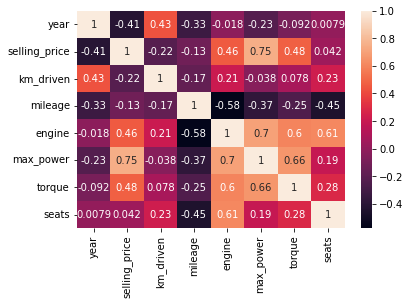

In [21]:
import seaborn as sns
sns.heatmap(car_data_dropped.corr(),annot=True)

In [22]:
car_data_dropped['selling_price_log'] = np.log1p(car_data_dropped['selling_price'])

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/2359468343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['selling_price_log'] = np.log1p(car_data_dropped['selling_price'])


### Check VIF 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+torque+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor                         features
0   2376.977479                        Intercept
1      1.254063                    name[T.Ashok]
2     11.301906                     name[T.Audi]
3     31.084377                      name[T.BMW]
4     57.388564                name[T.Chevrolet]
5      1.763148                   name[T.Daewoo]
6     17.399534                   name[T.Datsun]
7     11.317401                     name[T.Fiat]
8      2.519847                    name[T.Force]
9     94.304925                     name[T.Ford]
10   112.320472                    name[T.Honda]
11   286.468607                  name[T.Hyundai]
12     2.273852                    name[T.Isuzu]
13    19.161492                   name[T.Jaguar]
14     8.954954                     name[T.Jeep]
15     2.019785                      name[T.Kia]
16     2.538005                     name[T.Land]
17     9.984729                    name[T.Lexus]
18     1.774903                       name[T.MG]
19   173.816980     

<AxesSubplot:>

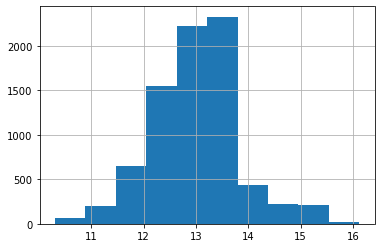

In [24]:
car_data_dropped['selling_price_log'].hist()

# Transform Name again 

In [25]:
local = ['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Toyota', 'Ford', 'Chevrolet', 'Renualt', 'Skoda', 'Nissan', 'Datsun', 'Fiat', 'Jeep', 'Force', 'Isuzu', 'Ambassador', 'Ashok']
imported = ['Volkswagen', 'BMW', 'Jaguar', 'Volvo', 'Mercedes-Benz', 'Audi', 'Lexus', 'Mitsubishi','Land' , 'Kia', 'MG', 'Daewoo', 'Opel']

In [26]:
def name_encoding(s):
    if s in local:
        return 'local'
    else:
        return 'imported'
    

In [27]:
car_data_dropped['name'] = car_data_dropped['name'].apply(name_encoding)

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/4173771347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['name'] = car_data_dropped['name'].apply(name_encoding)


In [28]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0,12.577640


# Model 2 

In [29]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+C(seats)',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     808.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:            -1.1379e+05
No. Observations:                7906   AIC:                         2.276e+05
Df Residuals:                    7880   BIC:                         2.278e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        7.107e+05   3.16e+05      2.246      0.025    9.05e+04    1.33e+06
name[T.local]                   -4.833e+05   1.87e+04    -25.879      0.000    -5.2e+05   -4.47e+05
fuel[T.Diesel]                  -1.391e+04    6.1e+04     -0.228      0.820   -1.33e+05    1.06e+05
fuel[T.LPG]                      2.605e+05   9.52e+04      2.736      0.006    7.39e+04    4.47e+05
fuel[T.Petrol]                  -3.292e+04   6.12e+04     -0.538      0.590   -1.53e+05     8.7e+04
seller_type[T.Individual]        -2.09e+05   1.56e+04    -13.378      0.000    -2.4e+05   -1.78e+05
seller_type[T.Trustmark Dealer] -2.343e+05   3.21e+04     -7.296      0.000   -2.97e+05   -1.71e+05
transmission[T.Manual]          -3.429e+05    1.9e+04    -18.002      0.000    -3.8e+05   -3.06e+05
owner[T.Fourth & Above Owner]    1.196e+04   3.62e+04      0.331      0.741    -5.9e+04    8.29e+04
owner[T.Second Owner]           -3.521e+04   1.26e+04     -2.792      0.005   -5.99e+04   -1.05e+04
owner[T.Test Drive Car]          1.957e+06   1.94e+05     10.099      0.000    1.58e+06    2.34e+06
owner[T.Third Owner]            -7309.3590   2.17e+04     -0.337      0.736   -4.98e+04    3.52e+04
C(seats)[T.4.0]                  2.922e+05   3.12e+05      0.935      0.350    -3.2e+05    9.05e+05
C(seats)[T.5.0]                 -3.485e+05   3.09e+05     -1.127      0.260   -9.55e+05    2.58e+05
C(seats)[T.6.0]                 -4.394e+05   3.13e+05     -1.403      0.161   -1.05e+06    1.75e+05
C(seats)[T.7.0]                 -3.823e+05   3.08e+05     -1.240      0.215   -9.86e+05    2.22e+05
C(seats)[T.8.0]                 -3.021e+05   3.09e+05     -0.978      0.328   -9.08e+05    3.03e+05
C(seats)[T.9.0]                 -2.524e+05   3.11e+05     -0.811      0.417   -8.62e+05    3.57e+05
C(seats)[T.10.0]                 -1.65e+05   3.23e+05     -0.511      0.609   -7.98e+05    4.68e+05
C(seats)[T.14.0]                -4.191e+05    5.3e+05     -0.791      0.429   -1.46e+06     6.2e+05
year                            -3.851e+04   1862.862    -20.675      0.000   -4.22e+04   -3.49e+04
km_driven                          -0.8356      0.103     -8.097      0.000      -1.038      -0.633
mileage                          1.532e+04   2057.081      7.445      0.000    1.13e+04    1.93e+04
engine                            129.3754     22.778      5.680      0.000      84.725     174.026
max_power                        1.176e+04    278.931     42.163      0.000    1.12e+04    1.23e+04
torque                            -87.8609     63.346     -1.387      0.165    -212.035      36.313
==============================================================================
Omnibus:                     3556.486   Durbin-Watson:                   1.623
Prob(Omnibus):           

# Transform Fuel

In [30]:
car_data_dropped['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [31]:
def fuel_encoding(s):
    if s in ['Petrol', 'Diesel']:
        return 'Coventional'
    else:
        return 'Others'
car_data_dropped['fuel'] = car_data_dropped['fuel'].apply(fuel_encoding)


/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/1263279573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['fuel'] = car_data_dropped['fuel'].apply(fuel_encoding)


In [32]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Coventional,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Coventional,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Coventional,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Coventional,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0,12.577640


# Model 3 

In [33]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1284.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:            -1.1393e+05
No. Observations:                7906   AIC:                         2.279e+05
Df Residuals:                    7890   BIC:                         2.280e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.741e+05      6e+04      6.231      0.000    2.56e+05    4.92e+05
name[T.local]                   -4.972e+05   1.87e+04    -26.556      0.000   -5.34e+05   -4.61e+05
fuel[T.Others]                   1.408e+05   4.76e+04      2.957      0.003    4.74e+04    2.34e+05
seller_type[T.Individual]       -2.136e+05   1.58e+04    -13.485      0.000   -2.45e+05   -1.83e+05
seller_type[T.Trustmark Dealer] -2.495e+05   3.23e+04     -7.726      0.000   -3.13e+05   -1.86e+05
transmission[T.Manual]          -3.697e+05   1.89e+04    -19.521      0.000   -4.07e+05   -3.33e+05
owner[T.Fourth & Above Owner]    8127.2066   3.68e+04      0.221      0.825   -6.39e+04    8.02e+04
owner[T.Second Owner]           -4.461e+04   1.28e+04     -3.490      0.000   -6.97e+04   -1.96e+04
owner[T.Test Drive Car]          1.963e+06   1.97e+05      9.959      0.000    1.58e+06    2.35e+06
owner[T.Third Owner]            -2.131e+04    2.2e+04     -0.968      0.333   -6.45e+04    2.19e+04
year                            -3.116e+04   1778.714    -17.519      0.000   -3.46e+04   -2.77e+04
km_driven                          -0.9577      0.103     -9.323      0.000      -1.159      -0.756
mileage                          1.565e+04   1700.332      9.206      0.000    1.23e+04     1.9e+04
engine                            125.9395     17.338      7.264      0.000      91.953     159.926
max_power                        1.137e+04    260.829     43.611      0.000    1.09e+04    1.19e+04
torque                            -45.0339     59.667     -0.755      0.450    -161.996      71.929
==============================================================================
Omnibus:                     3701.832   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59359.894
Skew:                           1.836   Prob(JB):                         0.00
Kurtosis:                      15.912   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Transform Owner 

In [34]:
def condense_owner(owner_str):
    if isinstance(owner_str, str):
#         if owner_str in ['Fourth & Above Owner', 'Third Owner']:
        if owner_str != 'First Owner':
#             return 'Third & Above'
            return 'Old'
        else:
#             return owner_str
            return 'New' 
        
car_data_dropped['owner'] = car_data_dropped['owner'].apply(condense_owner)
car_data_dropped.head()

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/1546790970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['owner'] = car_data_dropped['owner'].apply(condense_owner)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,New,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Old,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Old,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,New,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,New,16.10,1298.0,88.20,112.776475,5.0,11.775297


# Model 4

In [35]:
model =smf.ols('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      selling_price_log   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     4343.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:                -1702.7
No. Observations:                7906   AIC:                             3431.
Df Residuals:                    7893   BIC:                             3522.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          12.3526      0.041    301.001      0.000      12.272      12.433
name[T.local]                      -0.1393      0.013    -10.876      0.000      -0.164      -0.114
fuel[T.Others]                     -0.0375      0.033     -1.152      0.249      -0.101       0.026
seller_type[T.Individual]          -0.1140      0.011    -10.527      0.000      -0.135      -0.093
seller_type[T.Trustmark Dealer]    -0.0265      0.022     -1.202      0.230      -0.070       0.017
transmission[T.Manual]             -0.1368      0.013    -10.556      0.000      -0.162      -0.111
owner[T.Old]                       -0.0703      0.008     -8.471      0.000      -0.087      -0.054
year                               -0.1117      0.001    -92.845      0.000      -0.114      -0.109
km_driven                       -1.029e-07   7.03e-08     -1.464      0.143   -2.41e-07    3.49e-08
mileage                             0.0187      0.001     16.066      0.000       0.016       0.021
engine                              0.0004   1.19e-05     33.707      0.000       0.000       0.000
max_power                           0.0090      0.000     50.410      0.000       0.009       0.009
torque                              0.0002   4.08e-05      4.229      0.000    9.26e-05       0.000
==============================================================================
Omnibus:                      396.881   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.274
Skew:                          -0.379   Prob(JB):                    8.89e-163
Kurtosis:                       4.300   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

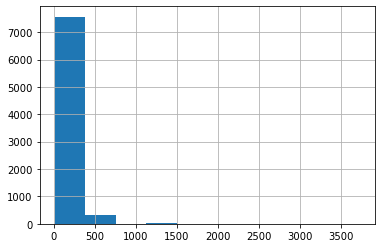

In [36]:
car_data_dropped['torque'].hist();

In [37]:
car_data_dropped['torque'].value_counts()


200.000000    693
190.000000    611
90.000000     408
113.000000    262
114.000000    246
             ... 
231.436940      1
90.221180       1
350.097405      1
136.312435      1
436.400000      1
Name: torque, Length: 253, dtype: int64

In [38]:
klist = sorted(car_data_dropped['torque'].value_counts().keys(), reverse=True)
{key: car_data_dropped['torque'].value_counts()[key] for key in klist}

{3726.5269999999996: 1,
 1863.2634999999998: 1,
 1421.96425: 10,
 1274.8645: 4,
 1127.7647499999998: 6,
 1078.7314999999999: 1,
 789.0: 3,
 640.0: 1,
 620.0: 10,
 619.0: 3,
 600.0: 4,
 580.0: 3,
 560.0: 2,
 550.0: 6,
 540.0: 2,
 519.75245: 1,
 510.0: 3,
 500.13915: 1,
 500.0: 9,
 490.0: 1,
 480.0: 1,
 470.0: 5,
 456.00922499999996: 1,
 450.0: 12,
 436.4: 1,
 436.39: 2,
 430.0: 64,
 424.0: 2,
 420.7: 2,
 420.0: 6,
 411.8793: 2,
 410.0: 1,
 402.0: 4,
 400.0: 168,
 385.0: 2,
 382.0: 4,
 380.0: 33,
 360.0: 48,
 358.92339: 2,
 355.0: 1,
 350.097405: 1,
 350.0: 57,
 347.0: 6,
 343.0: 46,
 340.0: 3,
 333.0: 1,
 330.484105: 1,
 330.0: 130,
 327.0: 11,
 323.61945: 1,
 321.0: 3,
 320.0: 150,
 314.79346499999997: 1,
 305.0: 9,
 300.0: 34,
 292.0: 1,
 290.0: 76,
 285.0: 1,
 280.0: 59,
 277.528195: 6,
 277.5: 10,
 263.7: 2,
 260.0: 43,
 259.9: 75,
 259.88: 2,
 259.87: 14,
 259.8: 65,
 250.069575: 6,
 250.06: 2,
 250.0: 143,
 248.0: 38,
 247.0: 21,
 245.16625: 2,
 245.0: 22,
 240.262925: 2,
 240.0: 

# Log transform torque

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/4069086739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['torque'] = np.log1p(car_data_dropped['torque'])


<AxesSubplot:>

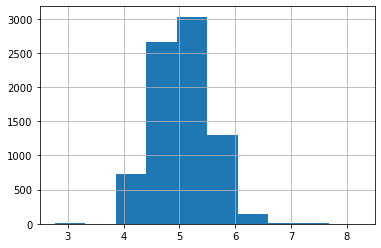

In [39]:
car_data_dropped['torque'] = np.log1p(car_data_dropped['torque'])
car_data_dropped['torque'].hist()

# Model 5 

In [40]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1608.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:            -1.1392e+05
No. Observations:                7906   AIC:                         2.279e+05
Df Residuals:                    7893   BIC:                         2.280e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        9.649e+05   7.93e+04     12.174      0.000     8.1e+05    1.12e+06
name[T.local]                   -5.082e+05   1.87e+04    -27.212      0.000   -5.45e+05   -4.72e+05
fuel[T.Others]                   8.132e+04   4.79e+04      1.697      0.090   -1.26e+04    1.75e+05
seller_type[T.Individual]       -2.245e+05   1.58e+04    -14.195      0.000   -2.56e+05   -1.94e+05
seller_type[T.Trustmark Dealer] -2.961e+05   3.24e+04     -9.144      0.000    -3.6e+05   -2.33e+05
transmission[T.Manual]          -3.455e+05   1.91e+04    -18.114      0.000   -3.83e+05   -3.08e+05
owner[T.Old]                    -2.929e+04   1.21e+04     -2.415      0.016   -5.31e+04   -5519.796
year                            -3.214e+04   1754.693    -18.315      0.000   -3.56e+04   -2.87e+04
km_driven                          -0.8325      0.103     -8.054      0.000      -1.035      -0.630
mileage                          2.172e+04   1794.215     12.104      0.000    1.82e+04    2.52e+04
engine                            221.3971     19.343     11.446      0.000     183.479     259.315
max_power                        1.278e+04    277.572     46.045      0.000    1.22e+04    1.33e+04
torque                           -1.95e+05   1.84e+04    -10.608      0.000   -2.31e+05   -1.59e+05
==============================================================================
Omnibus:                     3704.845   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61582.819
Skew:                           1.826   Prob(JB):                         0.00
Kurtosis:                      16.176   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

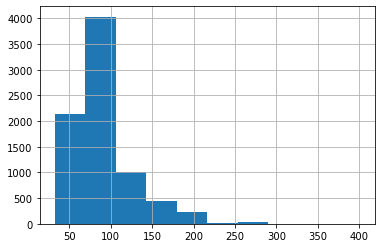

In [41]:
car_data_dropped['max_power'].hist()

# Log Transform max_power 

In [42]:
car_data_dropped['max_power'] = np.log1p(car_data_dropped['max_power'])

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/3332077293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['max_power'] = np.log1p(car_data_dropped['max_power'])


<AxesSubplot:>

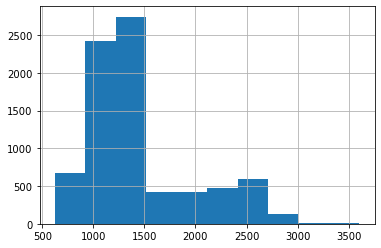

In [43]:
car_data_dropped['engine'].hist()

### Check VIF Again

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+torque+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


    VIF Factor                         features
0   557.042558                        Intercept
1     1.290326                    name[T.local]
2     1.025710                   fuel[T.Others]
3     1.447911        seller_type[T.Individual]
4     1.247333  seller_type[T.Trustmark Dealer]
5     1.598274           transmission[T.Manual]
6     1.356159                     owner[T.Old]
7     1.947151                             year
8     1.404339                        km_driven
9     2.194031                          mileage
10    4.055249                        max_power
11    4.085862                           torque
12    3.793221                           engine


# Influential points

In [45]:
car_data_dropped["res_sq"] = model.resid**2
model_res = smf.ols("res_sq ~ name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+torque+engine", data=car_data_dropped).fit()  
weight = model_res.fittedvalues
weight = abs(weight) 
weight = weight**-1 
car_data_dropped['weight'] = weight

/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/1758509484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped["res_sq"] = model.resid**2
/var/folders/hj/tkt5qlx16tx5xxf5p22r02s40000gn/T/ipykernel_23590/1758509484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['weight'] = weight


In [46]:
y=car_data_dropped.selling_price_log
x=car_data_dropped[['name','year', 'km_driven','fuel','seller_type','transmission','owner','mileage','max_power','torque','engine']]

In [47]:
mod_wls = sm.WLS(y,x.astype(float), car_data_dropped['weight'])
mod_res = mod_wls.fit()
print(mod_res.summary())

ValueError: could not convert string to float: 'local'

In [48]:
car_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7906 non-null   object 
 1   year               7906 non-null   int64  
 2   selling_price      7906 non-null   int64  
 3   km_driven          7906 non-null   int64  
 4   fuel               7906 non-null   object 
 5   seller_type        7906 non-null   object 
 6   transmission       7906 non-null   object 
 7   owner              7906 non-null   object 
 8   mileage            7906 non-null   float64
 9   engine             7906 non-null   float64
 10  max_power          7906 non-null   float64
 11  torque             7906 non-null   float64
 12  seats              7906 non-null   float64
 13  selling_price_log  7906 non-null   float64
 14  res_sq             7906 non-null   float64
 15  weight             7906 non-null   float64
dtypes: float64(8), int64(3),

In [49]:
from scipy.stats import boxcox 
transformed_data, best_lambda = boxcox(car_data_dropped['']) 
print(best_lambda)

KeyError: ''

# Box Cox transformation 

In [50]:
best = []
def box_cox(data):
    for i in data.columns:
        print('working on', i)
        data[i], best_lambda = boxcox(data[i])
        print('worked for', i)
        best.append(best_lambda)
    return data
    

In [51]:
# cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
#sorted(car_data_dropped['mileage'].value_counts())
# car_data_dropped['mileage'].value_counts()
car_data_dropped = car_data_dropped[car_data_dropped['mileage'] != 0.0]


In [52]:
def convert_name(name_str):
    if name_str == 'local':
        return 2
    else:
        return 1
    
def convert_fuel(fuel_str):
    if fuel_str == 'Coventional':
        return 2
    else:
        return 1
    
def convert_seller_type(seller_type_str):
    if seller_type_str == 'Individual':
        return 2
    else:
        return 1
    
def convert_transmission(transmission_str):
    if transmission_str == 'Manual':
        return 2
    else:
        return 1
    
def convert_owner(owner_str):
    if owner_str == 'New':
        return 2
    else:
        return 1

In [53]:
car_data_converted = car_data_dropped.copy()

In [56]:
car_data_converted['name'] = car_data_converted['name'].apply(convert_name)
car_data_converted['fuel'] = car_data_converted['fuel'].apply(convert_fuel)
car_data_converted['seller_type'] = car_data_converted['seller_type'].apply(convert_seller_type)
car_data_converted['owner'] = car_data_converted['owner'].apply(convert_owner)
car_data_converted['transmission'] = car_data_converted['transmission'].apply(convert_transmission)


In [57]:
car_data_converted.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log,res_sq,weight
0,2,7,450000,145500,2,2,2,2,23.40,1248.0,4.317488,5.252273,5.0,13.017005,4.131431e+10,2.338123e-11
1,2,7,370000,120000,2,2,2,1,21.14,1498.0,4.649378,5.525453,5.0,12.821261,3.958919e+10,9.997378e-12
2,2,15,158000,140000,2,2,2,1,17.70,1497.0,4.369448,4.832660,5.0,11.970357,1.658420e+10,8.037501e-12
3,2,11,225000,127000,2,2,2,2,23.00,1396.0,4.510860,5.396664,5.0,12.323860,1.188331e+10,1.247412e-11
4,2,14,130000,120000,2,2,2,2,16.10,1298.0,4.490881,4.734236,5.0,11.775297,2.308774e+09,7.655367e-12


In [58]:
box_cox(car_data_converted)

working on name
worked for name
working on year
worked for year
working on selling_price
worked for selling_price
working on km_driven
worked for km_driven
working on fuel
worked for fuel
working on seller_type
worked for seller_type
working on transmission
worked for transmission
working on owner
worked for owner
working on mileage
worked for mileage
working on engine
worked for engine
working on max_power
worked for max_power
working on torque
worked for torque
working on seats
worked for seats
working on selling_price_log
worked for selling_price_log
working on res_sq
worked for res_sq
working on weight
worked for weight


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log,res_sq,weight
0,1057.457882,2.519739,8.371555,199.601151,1.837999e+37,38.924757,181.053418,2.284572,14.533155,1.990209,1.118764,2.806120,0.25302,2.995657,88.940988,-81.431421
1,1057.457882,2.519739,8.295978,186.004066,1.837999e+37,38.924757,181.053418,0.000000,13.292215,1.995641,1.160373,2.942327,0.25302,2.975185,88.558235,-88.352047
2,1057.457882,3.901714,7.954477,196.805787,1.837999e+37,38.924757,181.053418,0.000000,11.352313,1.995622,1.125566,2.591053,0.25302,2.882855,81.061951,-90.210835
3,1057.457882,3.306725,8.098955,189.907148,1.837999e+37,38.924757,181.053418,2.284572,14.315270,1.993600,1.143523,2.878468,0.25302,2.921895,78.342023,-86.501182
4,1057.457882,3.765261,7.873129,186.004066,1.837999e+37,38.924757,181.053418,2.284572,10.425674,1.991419,1.141034,2.539504,0.25302,2.860876,66.094896,-90.630469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1057.457882,2.742874,8.239215,180.167164,1.837999e+37,38.924757,181.053418,2.284572,11.809501,1.988898,1.133229,2.543754,0.25302,2.959822,54.238478,-80.909601
8124,1057.457882,3.765261,7.888960,185.434706,1.837999e+37,38.924757,181.053418,0.000000,10.833170,1.995546,1.167475,2.912605,0.25302,2.865154,89.445069,-93.732935
8125,1057.457882,3.468922,8.308376,186.004066,1.837999e+37,38.924757,181.053418,2.284572,12.262884,1.990209,1.118588,2.806120,0.25302,2.978542,100.043251,-74.106357
8126,1057.457882,2.742874,8.200380,104.391110,1.837999e+37,38.924757,181.053418,2.284572,14.625538,1.993600,1.111466,2.651305,0.25302,2.949316,71.377254,-77.304800


# Model 6 

In [64]:
model =smf.ols('selling_price ~ year + km_driven + fuel + seller_type + transmission + owner + mileage + engine + max_power +torque',data=car_data_converted).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                      -7.311
Model:                            OLS   Adj. R-squared:                 -7.311
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 15 Oct 2021   Prob (F-statistic):                nan
Time:                        13:10:46   Log-Likelihood:                -10461.
No. Observations:                7889   AIC:                         2.092e+04
Df Residuals:                    7888   BIC:                         2.093e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.502e-74   3.09e-77    810.090      0.000     2.5e-74    2.51e-74
km_driven             0          0        nan        nan           0           0
fuel          4.547e-37   5.61e-40    810.090      0.000    4.54e-37    4.56e-37
seller_type   8.085e-73   9.98e-76    810.090      0.000    8.06e-73     8.1e-73
transmission  3.935e-72   4.86e-75    810.090      0.000    3.93e-72    3.94e-72
owner         3.771e-74   4.65e-77    810.090      0.000    3.76e-74    3.78e-74
mileage       3.079e-73    3.8e-76    810.090      0.000    3.07e-73    3.09e-73
engine        4.985e-74   6.15e-77    810.090      0.000    4.97e-74       5e-74
max_power      2.84e-74   3.51e-77    810.090      0.000    2.83e-74    2.85e-74
torque        6.771e-74   8.36e-77    810.090      0.000    6.75e-74    6.79e-74
==============================================================================
Omnibus:                    10424.108   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1501436.805
Skew:                           7.693   Prob(JB):                         0.00
Kurtosis:                      68.810   Cond. No.                     1.17e+52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': -111.8355645361909, 'LM-Test p-value': 1.0}


/Users/charu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


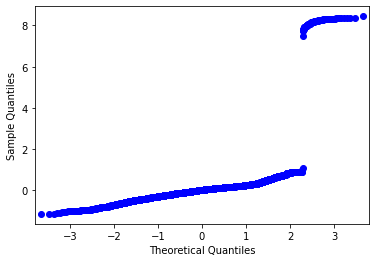

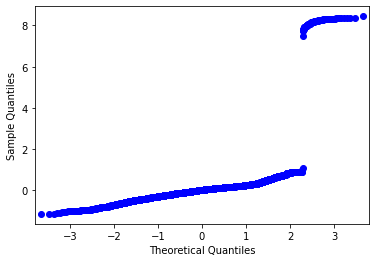

In [61]:
sm.qqplot(model.resid,)

In [ ]:
car_data_converted.head()